**1. Simple Neural Network Model**

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.losses import SparseCategoricalCrossentropy
import seaborn as sns

In [32]:
data = pd.read_csv("insurance_data.csv")
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [33]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(40, activation='sigmoid'),
    tf.keras.layers.Dense(60, activation='relu')
])

In [34]:
model.compile(optimizer='adam',
              loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [35]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 383ms/step - loss: 4.3637 - accuracy: 0.0000e+00
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 4.3493 - accuracy: 0.0000e+00
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 4.3355 - accuracy: 0.0000e+00
Epoch 4/100
1/1 [==============================] - 0s 13ms/step - loss: 4.3221 - accuracy: 0.0000e+00
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 4.3091 - accuracy: 0.0000e+00
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 4.2963 - accuracy: 0.0000e+00
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 4.2838 - accuracy: 0.0000e+00
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 4.2715 - accuracy: 0.0000e+00
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 4.2594 - accuracy: 0.0000e+00
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 4.2479 - acc

1/1 [==============================] - 0s 7ms/step - loss: 4.0943 - accuracy: 0.5238
Epoch 83/100
1/1 [==============================] - 0s 6ms/step - loss: 4.0943 - accuracy: 0.5238
Epoch 84/100
1/1 [==============================] - 0s 6ms/step - loss: 4.0943 - accuracy: 0.5238
Epoch 85/100
1/1 [==============================] - 0s 7ms/step - loss: 4.0943 - accuracy: 0.5238
Epoch 86/100
1/1 [==============================] - 0s 7ms/step - loss: 4.0943 - accuracy: 0.5238
Epoch 87/100
1/1 [==============================] - 0s 5ms/step - loss: 4.0943 - accuracy: 0.5238
Epoch 88/100
1/1 [==============================] - 0s 6ms/step - loss: 4.0943 - accuracy: 0.5238
Epoch 89/100
1/1 [==============================] - 0s 6ms/step - loss: 4.0943 - accuracy: 0.5238
Epoch 90/100
1/1 [==============================] - 0s 4ms/step - loss: 4.0943 - accuracy: 0.5238
Epoch 91/100
1/1 [==============================] - 0s 6ms/step - loss: 4.0943 - accuracy: 0.5238
Epoch 92/100
1/1 [===============

In [36]:
model.evaluate(x = X_test, y = y_test)

1/1 [==============================] - 0s 113ms/step - loss: 4.0943 - accuracy: 0.3333


[4.094344615936279, 0.3333333432674408]

In [37]:
predictions = model.predict(X_test)
y_pred = np.argmax(predictions,1)

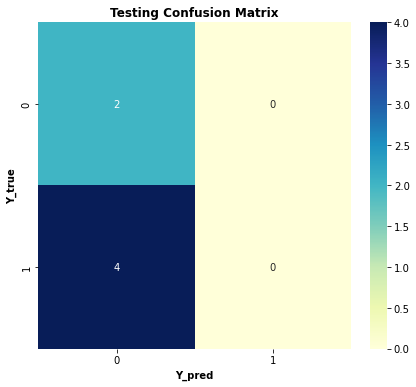

In [38]:
fig, ax = plt.subplots(figsize=(7,6))
sns.heatmap(ax=ax,data=confusion_matrix(y_test, y_pred), cmap="YlGnBu",annot=True, fmt="d" )
ax.set_xlabel("Y_pred",fontweight='bold')
ax.set_ylabel("Y_true",fontweight='bold')
plt.title('Testing Confusion Matrix',fontweight='bold')
plt.show()